In [0]:
# パッケージ のインポート
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# スロットのアームの作成
class SlotArm():
  # スロットのアームの初期化
  def __init__(self, p):
    self.p = p # コインが出る確率

  # アームを選択した時の報酬の取得
  def draw(self):
    if self.p > random.random():
      return 1.0
    else:
      return 0.0

In [0]:
# ε-greedyの計算処理の作成
class EpsilonGreedy():
  # ε-greedyの計算処理の初期化
  def __init__(self, epsilon):
    self.epsilon = epsilon # 探索する確率
  
  # 試行回数と価値のリセット
  def initialize(self, n_arms):
    self.n = np.zeros(n_arms) # 各アームの試行回数
    self.v = np.zeros(n_arms) # 各アームの価値

  # アームの選択
  def select_arm(self):
    if self.epsilon > random.random():
      # ランダムにアームを選択
      return np.random.randint(0, len(self.v))
    else:
      # 価値が高いアームを選択
      return np.argmax(self.v)

  # アルゴリズムのパラメータの更新
  def update(self, chosen_arm, reward, t):
    # 選択したアームの試行回数に１加算
    self.n[chosen_arm] += 1

    # 選択したアームの価値の更新
    n = self.n[chosen_arm]
    v = self.v[chosen_arm]
    self.v[chosen_arm] = ((n-1) / float(n)) * v + (1 / float(n)) * reward # 右辺第１項：前回の平均報酬、　第２項：今回の報酬

  # 文字列情報の取得
  def label(self):
    return 'ε-greedy(' + str(self.epsilon) + ')'

In [0]:
# UCB1アルゴリズム
class UCB1():
  # 試行回数と成功回数と価値のリセット
  def initialize(self, n_arms):
    self.n = np.zeros(n_arms) # 各アームの試行回数
    self.w = np.zeros(n_arms) # 各アームの成功回数
    self.v = np.zeros(n_arms) # 各アームの価値

  # アームの選択
  def select_arm(self):
    # nが全て１以上になるようにアームを選択
    for i in range(len(self.n)):
      if self.n[i] == 0:
        return i

    # 価値が高いアームを選択
    return np.argmax(self.v)

  # アルゴリズムのパラメータの更新
  def update(self, chosen_arm, reward, t):
    # 選択したアームの試行回数に１加算
    self.n[chosen_arm] += 1

    # 成功時は選択したアームの成功回数に１加算
    if reward == 1.0:
      self.w[chosen_arm] += 1

    # 試行回数が０のアームが存在時は価値を更新しない
    for i in range(len(self.n)):
      if self.n[i] == 0:
        return

    # 各アームの価値の更新
    for i in range(len(self.v)):
      self.v[i] = self.w[i] / self.n[i] + (2 * math.log(t) / self.n[i]) ** 0.5

  # 文字列情報の更新
  def label(self):
    return 'ucb1'

In [0]:
# シミュレーションの実行
def play(algo, arms, num_sims, num_time):
  # 履歴の準備
  times = np.zeros(num_sims * num_time) # ゲーム回数の何回目か
  rewards = np.zeros(num_sims * num_time) # 報酬

  # シミュレーション回数分のループ
  for sim in range(num_sims):
    algo.initialize(len(arms)) # アルゴリズム設定の初期化

    # ゲーム回数分のループ
    for time in range(num_time):
      # インデックスの計算
      index = sim * num_time + time

      # 履歴の計算
      times[index] = time + 1
      chosen_arm = algo.select_arm()
      reward = arms[chosen_arm].draw()
      rewards[index] = reward

      # アルゴリズムのパラメータの更新
      algo.update(chosen_arm, reward, time+1)

  return [times, rewards]

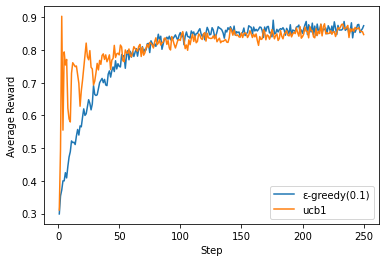

In [24]:
# アームの準備
arms = (SlotArm(0.3), SlotArm(0.5), SlotArm(0.9))

# アルゴリズムの準備
algos = (EpsilonGreedy(0.1), UCB1())

for algo in algos:
  # シミュレーションの実行
  results = play(algo, arms, 1000, 250)

  # グラフの表示
  df = pd.DataFrame({'times': results[0], 'rewards': results[1]})
  mean = df['rewards'].groupby(df['times']).mean()
  plt.plot(mean, label=algo.label())

plt.ylabel('Average Reward')
plt.xlabel('Step')
plt.legend(loc='best')
plt.show()